In [47]:
#Praca Licencjacka 2025

In [48]:
# Instalacja wymaganych bibliotek
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, spearmanr, jarque_bera
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [50]:
#Dane
data_path = "Model_Lekarz.xlsx" 
data = pd.read_excel(data_path)
data.head()

,nr_gosp,plec,wiek,wyksz,inwalidztwo,liczba_osob,doch_calkowity,klasa_miejsca,syt_mat,doch_os,wyd_calkowite,glowne_zrod_utrzym,moz_oszcz,R5,wyd_os_lek
0,13,1,61,2,2,3,4820.00,1,3,1606.666667,5089.05,4,2,300.0,100.0
1,16,2,24,2,2,2,2563.00,1,3,1281.500000,2291.80,5,4,150.0,75.0
2,28,1,79,3,2,2,4084.68,1,1,2042.340000,5842.62,5,2,230.0,115.0
3,32,2,58,3,2,2,3971.00,3,1,1985.500000,4553.61,3,2,100.0,50.0
4,33,1,69,2,2,2,5020.00,3,3,2510.000000,2539.88,4,2,80.0,40.0


In [51]:
#Przypisywanie kategorii i etykiet
data['miejscowosc'] = pd.Categorical(data['klasa_miejsca'], 
                                     categories=[1, 2, 3, 4, 5, 6], 
                                     ordered=True)
data['miejscowosc'] = data['miejscowosc'].cat.rename_categories(["powyzej 500 tys", "200-499 tys", 
                                                                 "100-199 tys", "20-99 tys", 
                                                                 "ponizej 20 tys", "wies"])

data['wyksztalcenie_1'] = pd.Categorical(data['wyksz'], 
                                       categories=[1, 2, 3], 
                                       ordered=True)
data['wyksztalcenie_1'] = data['wyksztalcenie_1'].cat.rename_categories(["podstawowe", "srednie", 
                                                                     "wyzsze"])

data['mozliwosci_oszczedzania_1'] = pd.Categorical(data['moz_oszcz'], 
                                                 categories=[1, 2, 3, 4], 
                                                 ordered=True)
data['mozliwosci_oszczedzania_1'] = data['mozliwosci_oszczedzania_1'].cat.rename_categories(["regularnie", "nieregularnie", 
                                                                                         "mozemy_ale_nie", "nie_mozemy"])

data['zrodlo_utrzymania_1'] = pd.Categorical(data['glowne_zrod_utrzym'], 
                                           categories=[1, 2, 3, 4, 5], 
                                           ordered=True)
data['zrodlo_utrzymania_1'] = data['zrodlo_utrzymania_1'].cat.rename_categories(["pracownicy", "rolnicy", 
                                                                             "praca na wlasny rachunek", "emeryt/rencista", 
                                                                             "niezarobkowe zrodla dochodu"])

data['sytuacja_materialna_1'] = pd.Categorical(data['syt_mat'], 
                                             categories=[1, 2, 3, 4, 5], 
                                             ordered=True)
data['sytuacja_materialna_1'] = data['sytuacja_materialna_1'].cat.rename_categories(["dobra", "raczej dobra", 
                                                                                 "przecietna", "raczej zla", "zla"])





# Filtrowanie danych
model2 = data[data['wyd_os_lek'] > 0]

In [52]:
model2.head()


,nr_gosp,plec,wiek,wyksz,inwalidztwo,liczba_osob,doch_calkowity,klasa_miejsca,syt_mat,doch_os,wyd_calkowite,glowne_zrod_utrzym,moz_oszcz,R5,wyd_os_lek,miejscowosc,wyksztalcenie_1,mozliwosci_oszczedzania_1,zrodlo_utrzymania_1,sytuacja_materialna_1
0,13,1,61,2,2,3,4820.00,1,3,1606.666667,5089.05,4,2,300.0,100.0,powyzej 500 tys,srednie,nieregularnie,emeryt/rencista,przecietna
1,16,2,24,2,2,2,2563.00,1,3,1281.500000,2291.80,5,4,150.0,75.0,powyzej 500 tys,srednie,nie_mozemy,niezarobkowe zrodla dochodu,przecietna
2,28,1,79,3,2,2,4084.68,1,1,2042.340000,5842.62,5,2,230.0,115.0,powyzej 500 tys,wyzsze,nieregularnie,niezarobkowe zrodla dochodu,dobra
3,32,2,58,3,2,2,3971.00,3,1,1985.500000,4553.61,3,2,100.0,50.0,100-199 tys,wyzsze,nieregularnie,praca na wlasny rachunek,dobra
4,33,1,69,2,2,2,5020.00,3,3,2510.000000,2539.88,4,2,80.0,40.0,100-199 tys,srednie,nieregularnie,emeryt/rencista,przecietna


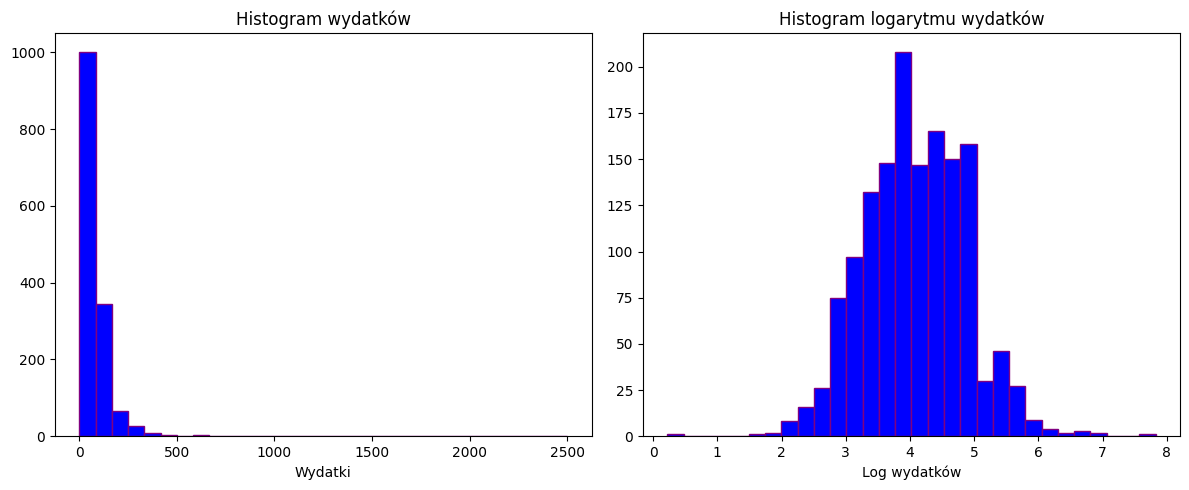

In [53]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram wydatków
ax1.hist(model2['wyd_os_lek'], bins=30, color='blue', edgecolor='purple')
ax1.set_xlabel('Wydatki')
ax1.set_title('Histogram wydatków')

# Histogram logarytmu wydatków
ax2.hist(np.log(model2['wyd_os_lek']), bins=30, color='blue', edgecolor='purple')
ax2.set_xlabel('Log wydatków')
ax2.set_title('Histogram logarytmu wydatków')

plt.tight_layout()
plt.show()

In [54]:
summary_wydatki_los = model2['wyd_os_lek'].describe()
print(summary_wydatki_los)

count    1458.000000
mean       82.184822
std       104.253813
min         1.250000
25%        35.000000
50%        60.000000
75%       100.000000
max      2500.000000
Name: wyd_os_lek, dtype: float64


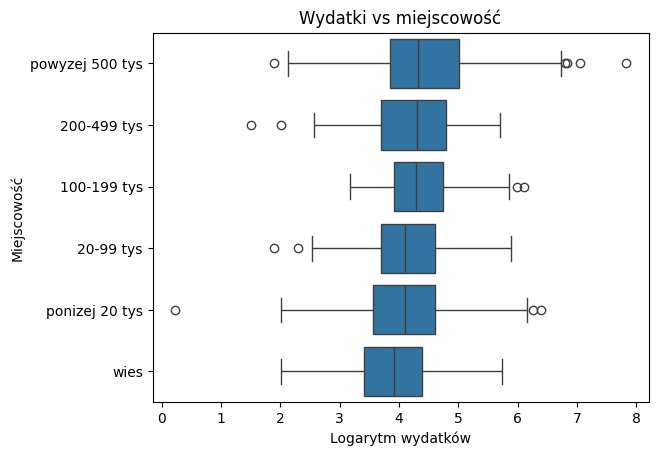

In [55]:
#Miejscowość
sns.boxplot(y=model2['miejscowosc'], x=np.log(model2['wyd_os_lek']), orient='h')
plt.title('Wydatki vs miejscowość')
plt.xlabel('Logarytm wydatków')
plt.ylabel('Miejscowość')
plt.show()

In [56]:
summary_miejscowosc = model2.groupby('miejscowosc', observed = 'False')['wyd_os_lek'].describe()
print(summary_miejscowosc)

                 count        mean         std        min        25%  \
miejscowosc                                                            
powyzej 500 tys  273.0  127.750409  199.650406   6.666667  46.666667   
200-499 tys       87.0   85.220307   60.614204   4.500000  40.000000   
100-199 tys       54.0  100.552469   87.901423  24.000000  50.000000   
20-99 tys        234.0   78.877350   59.517174   6.666667  40.000000   
ponizej 20 tys   168.0   85.311012   85.419254   1.250000  35.000000   
wies             642.0   61.239968   45.941622   7.500000  30.000000   

                       50%      75%     max  
miejscowosc                                  
powyzej 500 tys  75.000000  150.000  2500.0  
200-499 tys      73.333333  120.000   300.0  
100-199 tys      72.500000  115.000   450.0  
20-99 tys        60.000000  100.000   360.0  
ponizej 20 tys   60.000000  100.000   600.0  
wies             50.000000   79.625   310.0  


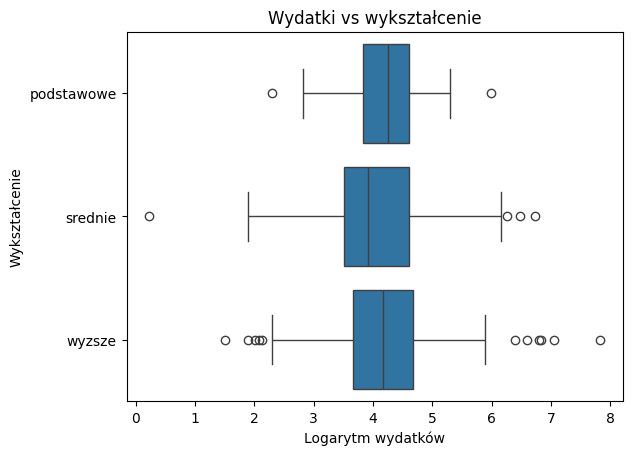

In [57]:
#Wykształcenie
sns.boxplot(y=model2['wyksztalcenie_1'], x=np.log(model2['wyd_os_lek']), orient='h')
plt.title('Wydatki vs wykształcenie')
plt.xlabel('Logarytm wydatków')
plt.ylabel('Wykształcenie')
plt.show()

In [58]:
summary_wyksztalcenie = model2.groupby('wyksztalcenie_1', observed = 'False')['wyd_os_lek'].describe()
print(summary_wyksztalcenie)


                 count       mean         std    min        25%   50%    75%  \
wyksztalcenie_1                                                                
podstawowe       143.0  78.660306   52.483750  10.00  45.833333  70.0  100.0   
srednie          840.0  75.212880   72.736347   1.25  33.333333  50.0  100.0   
wyzsze           475.0  95.575218  151.491955   4.50  38.750000  65.0  107.0   

                    max  
wyksztalcenie_1          
podstawowe        400.0  
srednie           830.0  
wyzsze           2500.0  


In [59]:
from scipy.stats import kruskal

# Dane do testu – oddzielne grupy
podstawowe = model2[model2['wyksztalcenie_1'] == 'podstawowe']['wyd_os_lek']
srednie = model2[model2['wyksztalcenie_1'] == 'srednie']['wyd_os_lek']
wyzsze = model2[model2['wyksztalcenie_1'] == 'wyzsze']['wyd_os_lek']

# Test Kruskala-Wallisa
stat, p = kruskal(podstawowe, srednie, wyzsze)

print(f"Wartość statystyki H = {stat:.4f}")
print(f"Wartość p = {p:.4f}")

if p < 0.05:
    print("Różnice pomiędzy grupami są statystycznie istotne (p < 0.05).")
else:
    print("Brak istotnych statystycznie różnic pomiędzy grupami.")

Wartość statystyki H = 17.0421
Wartość p = 0.0002
Różnice pomiędzy grupami są statystycznie istotne (p < 0.05).


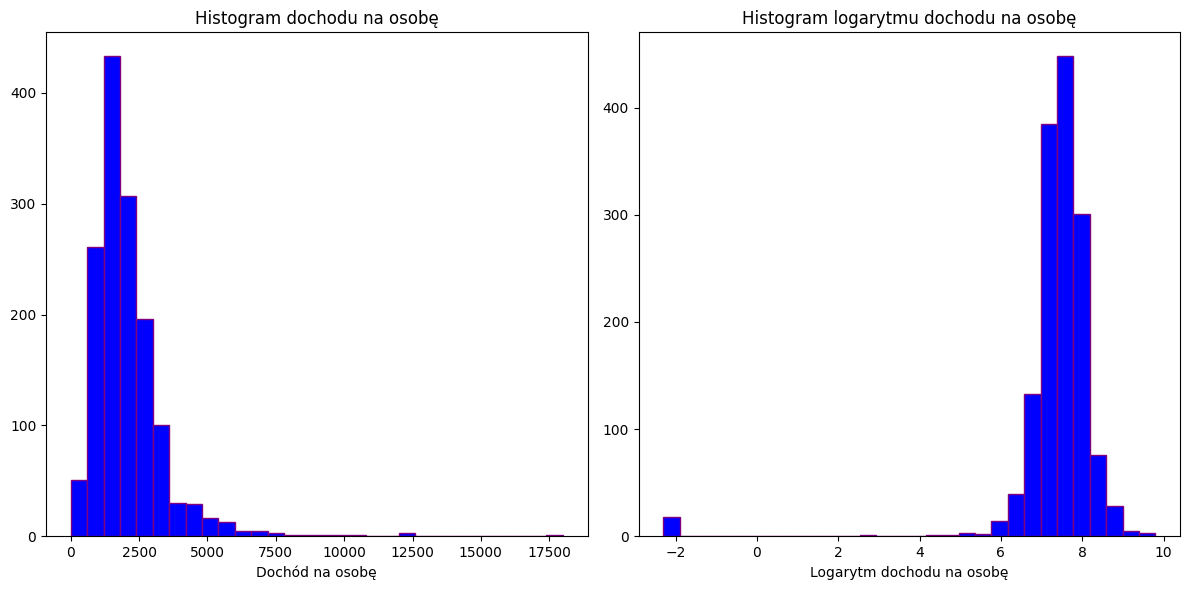

In [60]:
#Histogram dochodu
model2['dochod_los'] = model2['doch_os'].apply(lambda x: 0.1 if (x == 0 or x<0) else x)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(model2['dochod_los'], bins=30, color='blue', edgecolor = 'purple')
ax[0].set_title('Histogram dochodu na osobę')
ax[0].set_xlabel('Dochód na osobę')

ax[1].hist(np.log(model2['dochod_los']), bins=30, color='blue', edgecolor = 'purple')
ax[1].set_title('Histogram logarytmu dochodu na osobę')
ax[1].set_xlabel('Logarytm dochodu na osobę')

plt.tight_layout()
plt.show()

In [61]:
model2['log_dochod'] = np.log(model2['dochod_los'])
model2['log_dochod_kwadrat'] = model2['log_dochod'] ** 2

import statsmodels.formula.api as smf

model = smf.ols('wyd_os_lek ~ log_dochod + log_dochod_kwadrat', data=model2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             wyd_os_lek   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     64.03
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           2.23e-27
Time:                        22:40:29   Log-Likelihood:                -8781.9
No. Observations:                1458   AIC:                         1.757e+04
Df Residuals:                    1455   BIC:                         1.759e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -15.4865     16

In [62]:
summary_dochod_los = model2['doch_os'].describe()
print(summary_dochod_los)

count     1458.000000
mean      2054.386052
std       1346.060933
min      -3416.800000
25%       1281.248750
50%       1788.484333
75%       2500.000000
max      18000.000000
Name: doch_os, dtype: float64


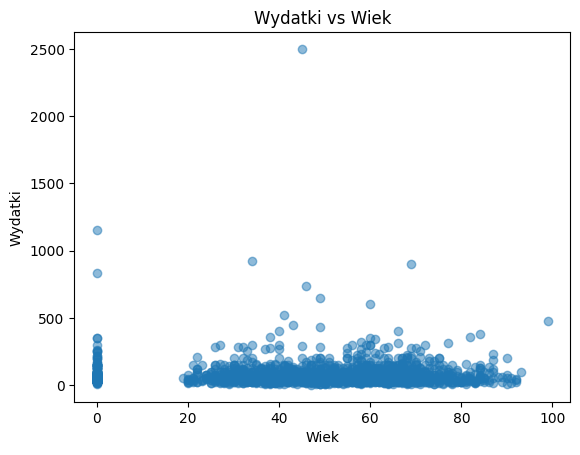

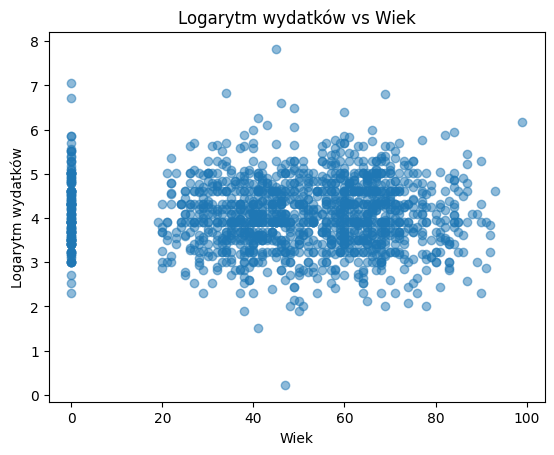

In [63]:
#Wykres rozrzutu
plt.scatter(model2['wiek'], model2['wyd_os_lek'], alpha=0.5)
plt.title('Wydatki vs Wiek')
plt.xlabel('Wiek')
plt.ylabel('Wydatki')
plt.show()

# Dla logarytmów
plt.scatter(model2['wiek'], np.log(model2['wyd_os_lek']), alpha=0.5)
plt.title('Logarytm wydatków vs Wiek')
plt.xlabel('Wiek')
plt.ylabel('Logarytm wydatków')
plt.show()

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie danych z pliku .xlsx
model2 = pd.read_excel('Model_Lekarz.xlsx')  

# Tworzenie zmiennych zero-jedynkowych dla wykształcenia
model2['wyzsze'] = model2['wyksz'].apply(lambda x: 1 if x == 3 else 0)
model2['srednie'] = model2['wyksz'].apply(lambda x: 1 if x == 2  else 0)
model2['podstawowe'] = model2['wyksz'].apply(lambda x: 1 if x == 1 else 0)
print(model2[['wyzsze', 'srednie', 'podstawowe']].sum())

# Miasto
model2['powyzej500tys'] = model2['klasa_miejsca'].apply(lambda x: 1 if x == 1 else 0)
model2['od200do499'] = model2['klasa_miejsca'].apply(lambda x: 1 if x == 2 else 0)
model2['od100do199'] = model2['klasa_miejsca'].apply(lambda x: 1 if x == 3 else 0)
model2['od20do99'] = model2['klasa_miejsca'].apply(lambda x: 1 if x == 4 else 0)
model2['ponizej20'] = model2['klasa_miejsca'].apply(lambda x: 1 if x == 5 else 0)
model2['wies'] = model2['klasa_miejsca'].apply(lambda x: 1 if x == 6 else 0)
print(model2[['powyzej500tys', 'od200do499', 'od100do199', 'od20do99', 'ponizej20', 'wies']].sum())

# Możliwości oszczędzania
model2['regularnie'] = model2['moz_oszcz'].apply(lambda x: 1 if x == 1 else 0)
model2['nieregularnie'] = model2['moz_oszcz'].apply(lambda x: 1 if x == 2 else 0)
model2['mozemy_ale_nie'] = model2['moz_oszcz'].apply(lambda x: 1 if x == 3 else 0)
model2['nie_mozemy'] = model2['moz_oszcz'].apply(lambda x: 1 if x == 4 else 0)
print(model2[['regularnie', 'nieregularnie', 'mozemy_ale_nie', 'nie_mozemy']].sum())

# Sytuacja materialna
model2['dobra'] = model2['syt_mat'].apply(lambda x: 1 if x == 1 else 0)
model2['raczej_dobra'] = model2['syt_mat'].apply(lambda x: 1 if x == 2 else 0)
model2['przecietna'] = model2['syt_mat'].apply(lambda x: 1 if x == 3 else 0)
model2['raczej_zla'] = model2['syt_mat'].apply(lambda x: 1 if x == 4 else 0)
model2['zla'] = model2['syt_mat'].apply(lambda x: 1 if x == 5 else 0)
print(model2[['dobra', 'raczej_dobra', 'przecietna', 'raczej_zla', 'zla']].sum())

# Źródło utrzymania
model2['pracownicy'] = model2['glowne_zrod_utrzym'].apply(lambda x: 1 if x == 1 else 0)
model2['rolnicy'] = model2['glowne_zrod_utrzym'].apply(lambda x: 1 if x == 2 else 0)
model2['wlasny_rachunek'] = model2['glowne_zrod_utrzym'].apply(lambda x: 1 if x == 3 else 0)
model2['emeryt_rencista'] = model2['glowne_zrod_utrzym'].apply(lambda x: 1 if x == 4 else 0)
model2['niezarobkowe'] = model2['glowne_zrod_utrzym'].apply(lambda x: 1 if x == 5 else 0)
print(model2[['pracownicy', 'rolnicy', 'wlasny_rachunek', 'emeryt_rencista', 'niezarobkowe']].sum())


wyzsze        475
srednie       840
podstawowe    143
dtype: int64
powyzej500tys    273
od200do499        87
od100do199        54
od20do99         234
ponizej20        168
wies             642
dtype: int64
regularnie        329
nieregularnie     748
mozemy_ale_nie    110
nie_mozemy        271
dtype: int64
dobra           350
raczej_dobra    368
przecietna      674
raczej_zla       56
zla              10
dtype: int64
pracownicy         691
rolnicy             78
wlasny_rachunek    127
emeryt_rencista    531
niezarobkowe        31
dtype: int64


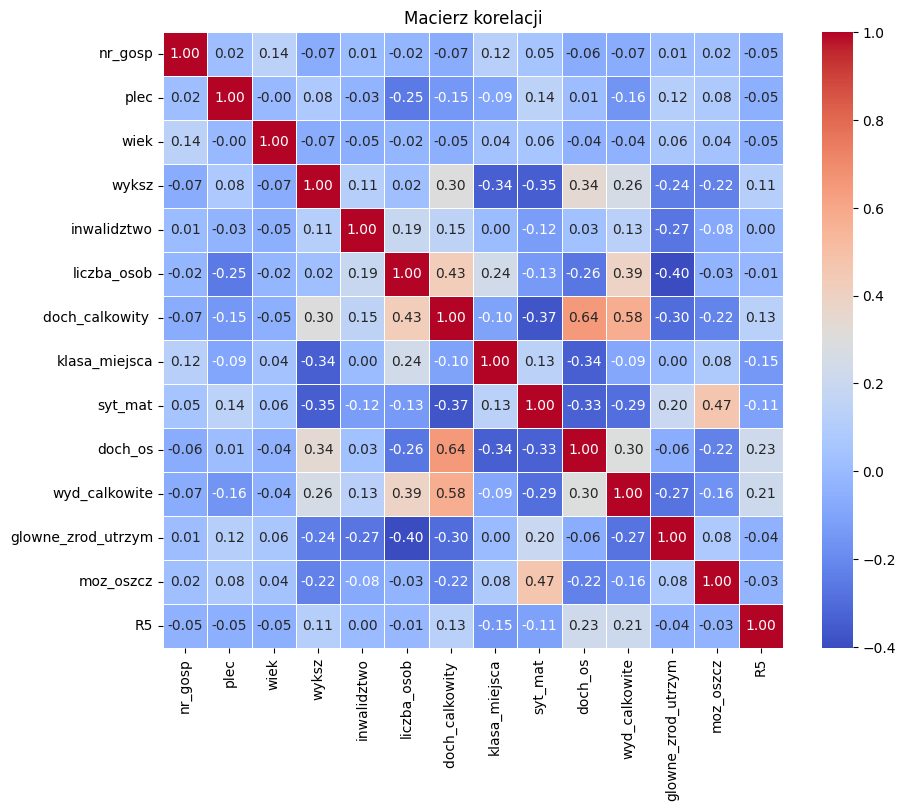

In [65]:
#Macierz korelacji
first_12_columns = model2.iloc[:, :14]

# Obliczamy macierz korelacji
correlation_matrix = first_12_columns.corr()

# Wyświetlamy macierz korelacji jako wykres
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

In [66]:
import statsmodels.formula.api as smf


# Zmienna zależna (logarytm wydatków)
model2['log_wydatki'] = model2['wyd_os_lek'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Formuła regresji
formula = "log_wydatki ~ wiek + doch_os + wyzsze + srednie + powyzej500tys + od200do499 + od100do199 + od20do99 + ponizej20 + rolnicy + wlasny_rachunek + emeryt_rencista + niezarobkowe + liczba_osob + regularnie + nieregularnie + mozemy_ale_nie +  plec + inwalidztwo"

# Regresja
reg_model2 = smf.ols(formula=formula, data=model2).fit()

# Wyniki
print(reg_model2.summary())



                            OLS Regression Results                            
Dep. Variable:            log_wydatki   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     61.09
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          3.03e-169
Time:                        22:40:33   Log-Likelihood:                -1277.9
No. Observations:                1458   AIC:                             2596.
Df Residuals:                    1438   BIC:                             2701.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.9042      0.155     

In [67]:

#Model aby zaobserwować obserwacje odstające

In [68]:
#odstajace

In [69]:
import stargazer
print(stargazer.__file__)
print(dir(stargazer))

c:\Users\karon\Miniconda3\envs\blockchain\Lib\site-packages\stargazer\__init__.py
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'name']


In [70]:
#levare point 
h_lev = (2*len(reg_model2.params))/reg_model2.nobs
round(h_lev, 2)

0.03

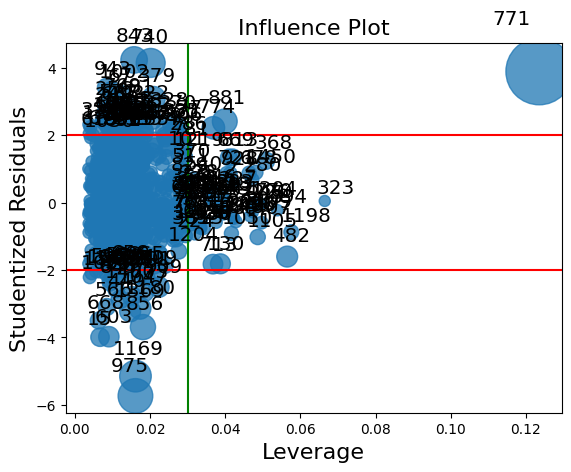

In [71]:
sm.graphics.influence_plot(reg_model2, criterion = 'Cooks')
plt.axvline(x = round(h_lev, 2), color = 'g')
plt.axhline(y = 2, color = 'r')
plt.axhline(y = -2, color = 'r')
plt.show()

In [72]:
model3 = model2.drop(index=[771, 975, 1169, 881, 740, 974, 842, 482, 943, 603])

In [73]:
import statsmodels.formula.api as smf


# Zmienna zależna (logarytm wydatków)
model3['log_wydatki'] = model3['wyd_os_lek'].apply(lambda x: np.log(x) if x > 0 else np.nan)

model3['dochod_los'] = model3['doch_os'].apply(lambda x: 0.1 if (x == 0 or x<0) else x)

# Formuła regresji
formula = "np.log(log_wydatki) ~ np.log(dochod_los) + wyzsze + srednie + powyzej500tys + od200do499 + od100do199 + od20do99 + ponizej20 + liczba_osob +I(liczba_osob**2) + I(liczba_osob**3)  + inwalidztwo"

# Regresja
reg_2 = smf.ols(formula=formula, data=model3).fit()

# Wyniki
print(reg_2.summary())



                             OLS Regression Results                            
Dep. Variable:     np.log(log_wydatki)   R-squared:                       0.476
Model:                             OLS   Adj. R-squared:                  0.471
Method:                  Least Squares   F-statistic:                     108.6
Date:                 Sun, 13 Apr 2025   Prob (F-statistic):          2.05e-191
Time:                         22:40:38   Log-Likelihood:                 795.43
No. Observations:                 1448   AIC:                            -1565.
Df Residuals:                     1435   BIC:                            -1496.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               

<Axes: xlabel='predictions', ylabel='residuals'>

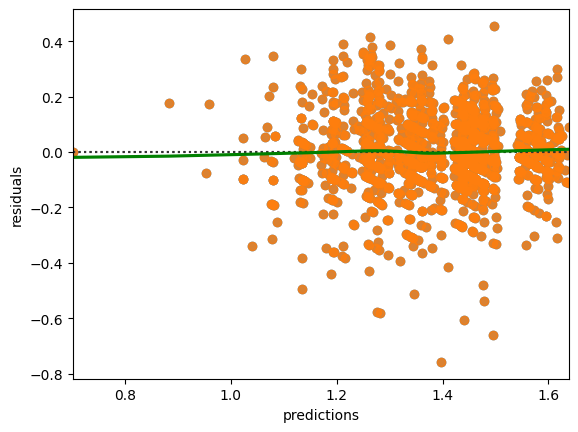

In [74]:
#Test Reset 
#najważniejsze założenie - czy jest to regresja liniowa 
model3['residuals'] = reg_2.resid

model3['predictions'] = reg_2.predict()

sns.residplot(data = model3, x = 'predictions' , y = 'residuals', line_kws = dict(color = 'g'))

sns.residplot(data = model3, x = 'predictions' , y = 'residuals', lowess = True, line_kws = dict(color = 'g'))
#ta zielona linia jest rodzajem spłaczczenia wykresu rozrzutu - nam zależy na tym aby ta zielona linia polrywała się z linią kropkowaną.
#Idealnia jak ta zielona się pokrywa z kropkowaną 

In [75]:
#Zielona linia nie jest zupełnie płaska – delikatnie się wygina, co może sugerować nieliniowość, poprawa do 44% reset przy pomocy logarytmu i zmiennych do kwadratu

# Można zauważyć wachlarzowaty kształt – wariancja reszt nie jest całkiem stała (homoskedastyczna). Przy większych wartościach predykcji rozrzut się zwiększa → możliwa heteroskedastyczność.#
#Następnie testy na heteroskedastycznosc - najprawdopodobniej uzycie macierzy odpornej 

In [76]:
#sam test reset
import statsmodels.stats.api as sms
sms.linear_reset(reg_2, power = 4, test_type ='fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=2.709230115482246, p-value=0.43866101119002265, df_denom=3>

Text(0, 0.5, 'residuals')

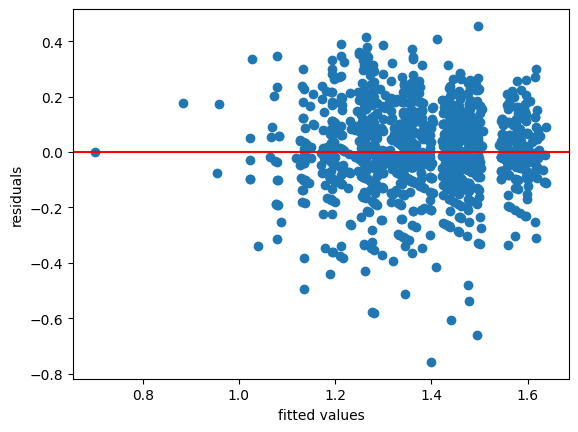

In [77]:
#Heteroskedastyczność
plt.scatter(reg_2.fittedvalues, reg_2.resid)
plt.axhline(y = 0, color = 'red')
plt.xlabel('fitted values')
plt.ylabel('residuals')
#więcej zaznaczonych obszarów na dole wykresu rozrzutu - podejrzenie o homoskedastycznosci

Text(0, 0.5, 'residuals')

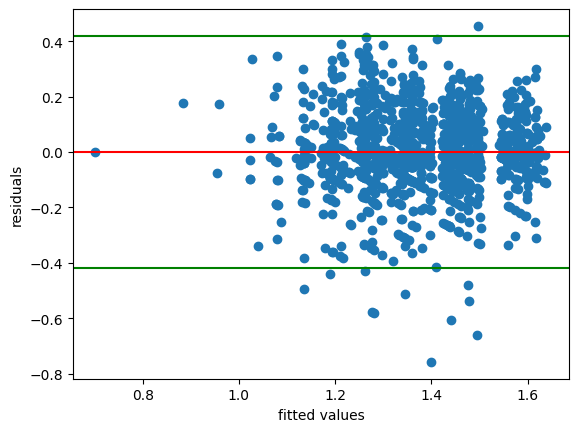

In [78]:
plt.scatter(reg_2.fittedvalues, reg_2.resid)
plt.axhline(y = 0, color = 'red')
plt.axhline(y = 0 + 3*reg_2.resid.std(), color = 'green')
plt.axhline(y = 0 - 3*reg_2.resid.std(), color = 'green')
plt.xlabel('fitted values')
plt.ylabel('residuals')

In [79]:
#test B-P
test1 = sms.het_breuschpagan(reg_2.resid, reg_2.model.exog)
test1
#Odrzucam hipotezę zerowoą o homoskedastycznosci

(np.float64(47.833489817867864),
 np.float64(3.341246030328118e-06),
 np.float64(4.085291367697863),
 np.float64(2.692375981383734e-06))

In [80]:
test2 = sms.het_white(reg_2.resid, reg_2.model.exog)
test2
#nie zdaje Whitey'a pomimo prob poprawy jak dodanie poteg, czy logarytmu, zatem stosuję macierz odporną 

(np.float64(103.68803241382594),
 np.float64(0.0034581848074056844),
 np.float64(1.5641698914335933),
 np.float64(0.002730358664386174))

In [81]:
#Heteroskedastycznosc, zatem uzywam macierzy odpornej 

In [82]:
#Macierz Odporna 

In [83]:
import statsmodels.formula.api as smf


# Zmienna zależna (logarytm wydatków)
model3['log_wydatki'] = model3['wyd_os_lek'].apply(lambda x: np.log(x) if x > 0 else np.nan)

model3['dochod_los'] = model3['doch_os'].apply(lambda x: 0.1 if (x == 0 or x<0) else x)

# Formuła regresji
formula = "np.log(log_wydatki) ~ np.log(dochod_los) + wyzsze + srednie + powyzej500tys + od200do499 + od100do199 + od20do99 + ponizej20 + liczba_osob +I(liczba_osob**2) + I(liczba_osob**3)  + inwalidztwo"
robust_reg_3 = smf.ols(formula=formula, data=model3).fit(cov_type = 'HC0')
print(robust_reg_3.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(log_wydatki)   R-squared:                       0.476
Model:                             OLS   Adj. R-squared:                  0.471
Method:                  Least Squares   F-statistic:                     124.7
Date:                 Sun, 13 Apr 2025   Prob (F-statistic):          1.33e-212
Time:                         22:40:39   Log-Likelihood:                 795.43
No. Observations:                 1448   AIC:                            -1565.
Df Residuals:                     1435   BIC:                            -1496.
Df Model:                           12                                         
Covariance Type:                   HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               

In [84]:
#sam test reset
import statsmodels.stats.api as sms
sms.linear_reset(robust_reg_3, power = 4, test_type ='fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=2.709230115482246, p-value=0.43866101119002265, df_denom=3>

In [85]:
#VIF

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy

# Przygotowanie macierzy projektowej na podstawie formuły modelu
y, X = patsy.dmatrices(formula, data=model3, return_type="dataframe")

# Obliczanie współczynników VIF
vif_data = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Wyświetlenie tabeli
print(vif_data)

               Variable         VIF
0             Intercept  117.443363
1    np.log(dochod_los)    1.091320
2                wyzsze    3.405212
3               srednie    3.111109
4         powyzej500tys    1.383554
5            od200do499    1.143288
6            od100do199    1.108817
7              od20do99    1.236577
8             ponizej20    1.158111
9           liczba_osob   54.605851
10  I(liczba_osob ** 2)  183.196819
11  I(liczba_osob ** 3)   52.365797
12          inwalidztwo    1.071311


In [87]:
#Vify bez przekształceń zmiennych poniżej 10 - w porządku 

In [88]:
#Test J-B
from statsmodels.stats.stattools import jarque_bera

In [89]:
residuals_j_b = robust_reg_3.resid

In [90]:
jb_test_stat, jb_pvalue, skew, kurtosis = jarque_bera(residuals_j_b)
print(f"Statystyka testu: {jb_test_stat}, p-wartość: {jb_pvalue}")

Statystyka testu: 275.0679451695213, p-wartość: 1.861035391386616e-60


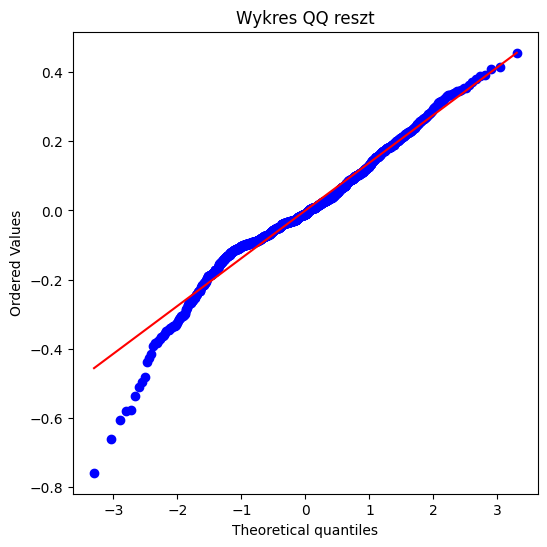

In [91]:
import scipy.stats as stats
# Tworzymy wykres QQ
plt.figure(figsize=(6,6))
stats.probplot(residuals_j_b, dist="norm", plot=plt)

# Wyświetlamy wykres
plt.title('Wykres QQ reszt')
plt.show()

In [92]:
#W środkowym zakresie (od ok. -2 do +2) reszty dobrze pokrywają się z linią → rozkład jest bliski normalnemu.

#Na krańcach (zarówno dla niskich, jak i wysokich wartości) widać niewielkie odchylenia od czerwonej linii – to typowe i nie musi od razu świadczyć o dużym problemie.

#Dane empiryczne często mają grubsze lub cieńsze ogony --> Mam ponad 1000 obserwacji dzięki Centralnemu Twierdzeniu Granicznego (CTG) --> zakładam noramalność rozkłądu